In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

# Exploratory Data Analysis

In [24]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [27]:
# rename the Annual Income (k$) column
df = df.rename(columns={"Annual Income (k$)": "Annual Income"})
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
# Missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income             0
Spending Score (1-100)    0
dtype: int64

In [29]:
# Checking Duplicates
df.duplicated().sum()

0

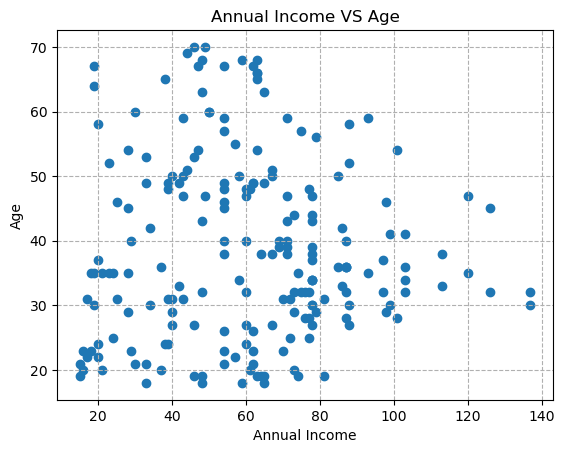

In [36]:
plt.scatter(df['Annual Income'], df['Age'])
plt.title('Annual Income VS Age')
plt.xlabel('Annual Income')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--')
plt.show()

The scatter plot of Annual Income vs Age shows that there is no strong linear relationship between a customer’s age and their income. Customers across different age groups have a wide range of income levels, indicating that both younger and older individuals can belong to either low, medium, or high-income segments. This suggests that income is not strictly dependent on age within this mall’s customer base, and marketing strategies should consider other factors—such as spending behavior or lifestyle preferences—rather than relying solely on age demographics to target high-income customers.

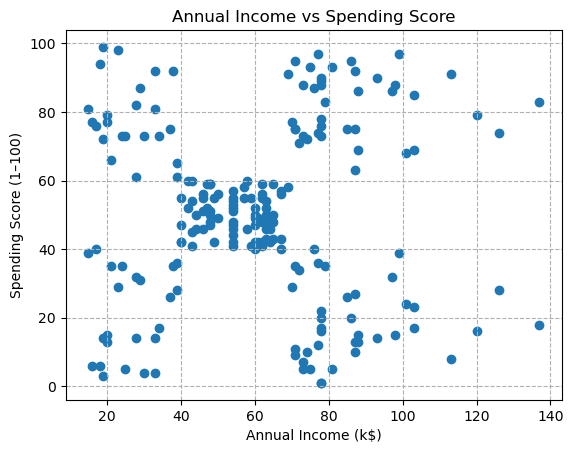

In [33]:
plt.scatter(df['Annual Income'], df['Spending Score (1-100)'])
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.grid(axis='both', linestyle='--')
plt.show()

The scatter plot of Annual Income vs Spending Score reveals several distinct customer patterns. Customers with moderate incomes tend to display a wide range of spending behaviors, while those with very high or very low incomes often cluster toward either high or low spending scores. This indicates that income alone does not determine spending habits, some high-income customers spend conservatively, while others with lower income show higher spending tendencies. The visible groupings also suggest potential natural clusters, making this feature pair highly relevant for segmentation using K-Means clustering.

C:\Users\Angeline O.L\AppData\Local\Temp\ipykernel_11260\2306282163.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


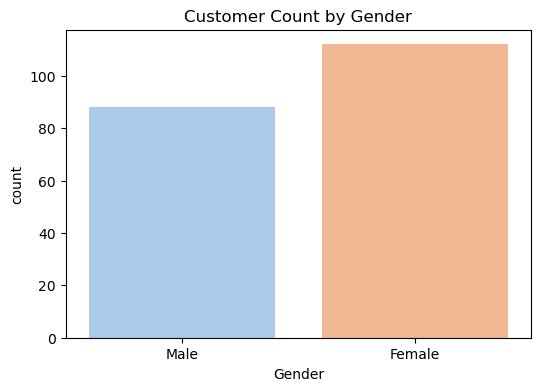

In [35]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Customer Count by Gender')
plt.show()

The bar chart of Customer Count by Gender shows the overall gender distribution among mall customers. The data indicates a slightly higher proportion of female customers compared to males, suggesting that women may represent a larger share of the mall’s customer base. This insight is valuable for marketing strategy, as it implies that promotions, product placements, and campaign themes could be more effective if they cater to female preferences, while still maintaining engagement with male shoppers to ensure balanced customer retention.

In [34]:
# create new dataframe that consist only annual income and spending score
df = df[['Gender','Age', 'Annual Income', 'Spending Score (1-100)']]
df.head()

,Gender,Age,Annual Income,Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


The CustomerID column was dropped because it serves only as a unique identifier for each customer and does not contain any meaningful information for clustering or analysis. Since every value in this column is distinct, it does not contribute to identifying patterns or similarities between customers. Including such an identifier in distance-based algorithms like K-Means could distort the clustering results, so it is excluded to ensure that only relevant demographic and behavioral features like Gender, Age, Annual Income, and Spending Score are used in the analysis.

# Encoding

In [39]:
# Female = 1, Male = 0
df_encoded = df.copy()

df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 0, 'Female': 1})

df_encoded.head()

,Gender,Age,Annual Income,Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


The Gender column was manually encoded into numeric form where Male = 0 and Female = 1. This conversion allows the categorical variable to be used in mathematical operations required for clustering algorithms. Manual encoding is used here for transparency and interpretability, ensuring that gender differences can still be analyzed meaningfully during cluster profiling.

# Data Scaling (Choose One)

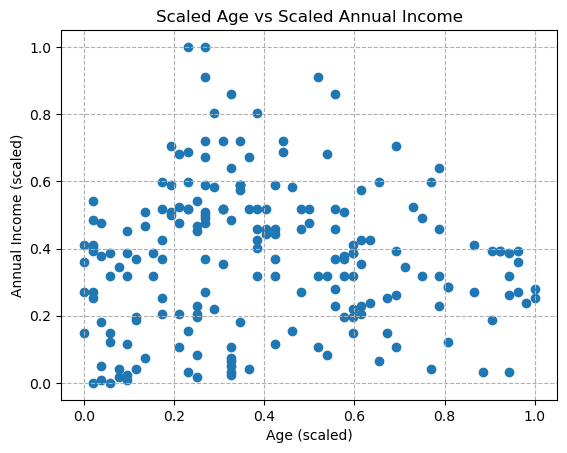

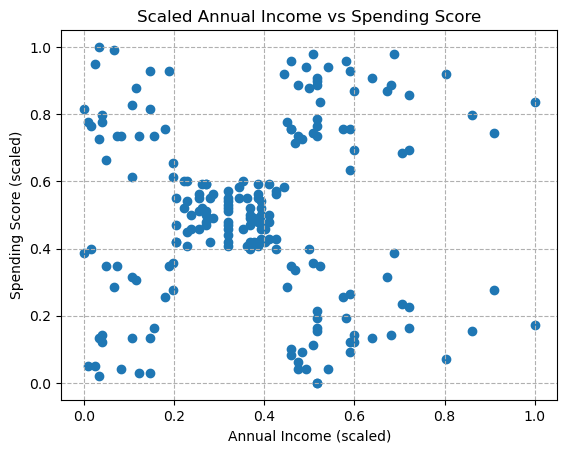

In [50]:
# scale dataset with Min Max scaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

X = df_encoded[['Gender', 'Age', 'Annual Income', 'Spending Score (1-100)']]

scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Scatter plot 1: Annual Income vs Age
plt.scatter(df_minmax_scaled["Age"], df_minmax_scaled["Annual Income"])
plt.xlabel("Age (scaled)")
plt.ylabel("Annual Income (scaled)")
plt.title("Scaled Age vs Scaled Annual Income")
plt.grid(axis='both', linestyle='--')
plt.show()

# Scatter plot 2: Annual Income vs Spending Score
plt.scatter(df_minmax_scaled["Annual Income"], df_minmax_scaled["Spending Score (1-100)"])
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Scaled Annual Income vs Spending Score")
plt.grid(axis='both', linestyle='--')
plt.show()

The dataset was scaled using the Min-Max Scaler to normalize all numeric features within the range of 0 to 1. This ensures that each variable Gender, Age, Annual Income, and Spending Score contributes equally during clustering.

Scaled Age vs Scaled Annual Income
The scatter plot shows that there is no strong linear relationship between customers’ age and their annual income after scaling. Customers of different ages appear across various income levels, suggesting that income is not significantly influenced by age in this dataset.

Scaled Annual Income vs Scaled Spending Score
The plot indicates a visible grouping pattern, where customers with medium income levels tend to have a wide range of spending scores. This pattern may suggest the presence of distinct customer segments, for example, high-income customers who spend conservatively versus moderate-income customers who spend more freely.

# K-Means Clustering

In [51]:
from sklearn.cluster import KMeans

c:\Anaconda Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there a

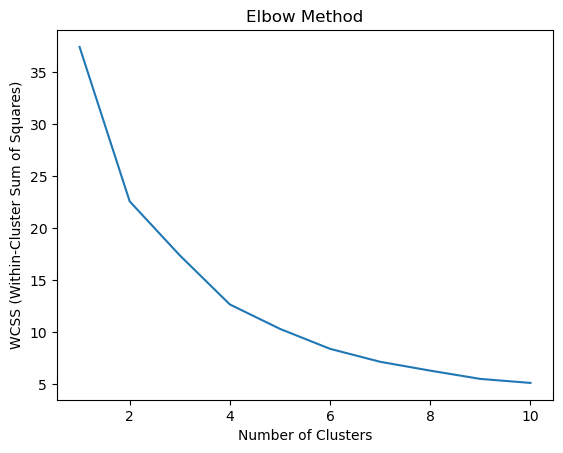

In [55]:
X = df_minmax_scaled[['Age', 'Annual Income', 'Spending Score (1-100)']]

wcss = []
for i in range(1, 11):  # mencoba jumlah cluster dari 1 sampai 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# visualisasi elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [56]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters       WCSS
0                   1  37.401482
1                   2  22.560775
2                   3  17.370109
3                   4  12.650288
4                   5  10.303965
5                   6   8.385099
6                   7   7.140215
7                   8   6.289526
8                   9   5.493770
9                  10   5.109273


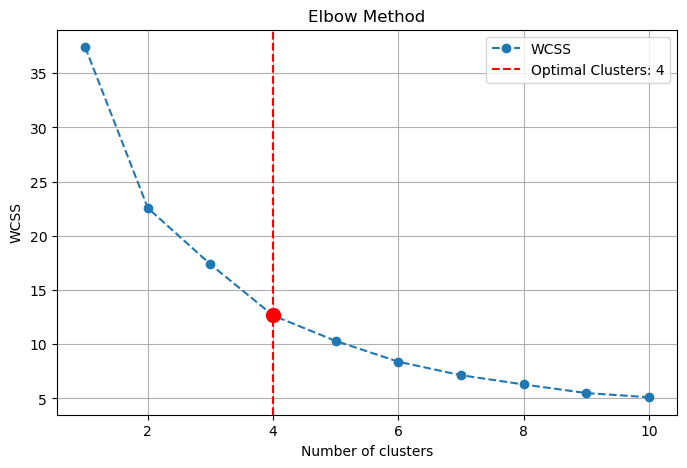

The optimal number of clusters is: 4


In [57]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

Based on the Elbow Method visualization, the curve shows a clear bend (or “elbow”) at K = 4, where the rate of decrease in WCSS (Within-Cluster Sum of Squares) starts to level off. This indicates that adding more clusters beyond four provides diminishing improvements in reducing variance within the clusters. Therefore, four clusters is identified as the optimal number, effectively balancing between model simplicity and clustering accuracy for representing the customer segments in this dataset.

In [59]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_minmax_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

c:\Anaconda Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Gender,Age,Annual Income,Spending Score (1-100),KMeans_Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


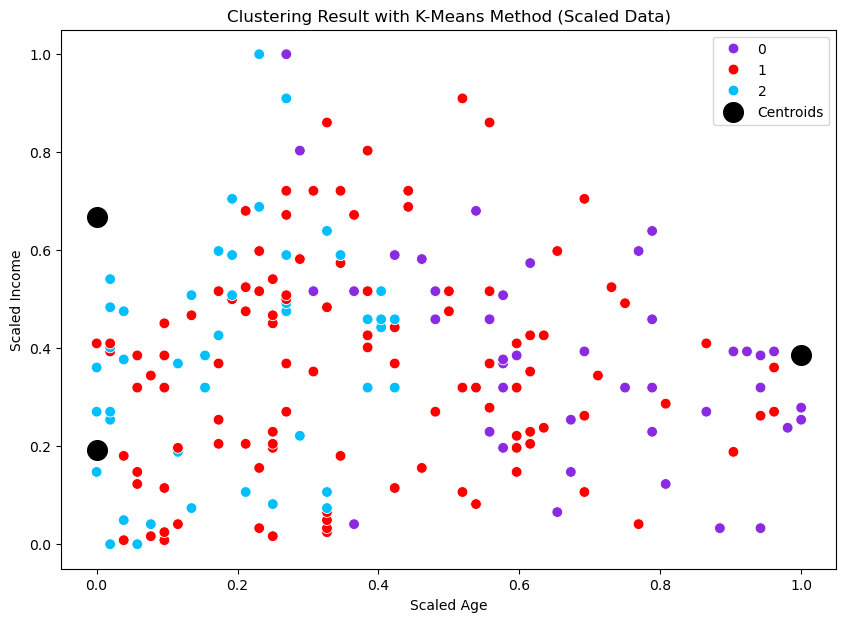

In [61]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))
sns.scatterplot(x="Age", y="Annual Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_minmax_scaled, s=60)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

The scatter plot above visualizes the customer segmentation results from the K-Means clustering using scaled data. Each color represents a distinct cluster, showing how customers are grouped based on their age and annual income similarities. The black dots indicate the centroids or central points of each cluster, which represent the average characteristics of customers in that group. This visualization helps identify distinct customer patterns, for instance, younger customers with lower income may cluster separately from older, higher-income customers, providing insights that can guide targeted marketing strategies. The uneven distribution suggests that while K-Means can separate groups with similar characteristics, customer behavior in this dataset may be diverse and overlapping, meaning further analysis with additional features (like spending score or lifestyle variables) could improve segmentation clarity.

C:\Users\Angeline O.L\AppData\Local\Temp\ipykernel_11260\2941336628.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=clusters, y=df_minmax_scaled[f], palette='Set2')


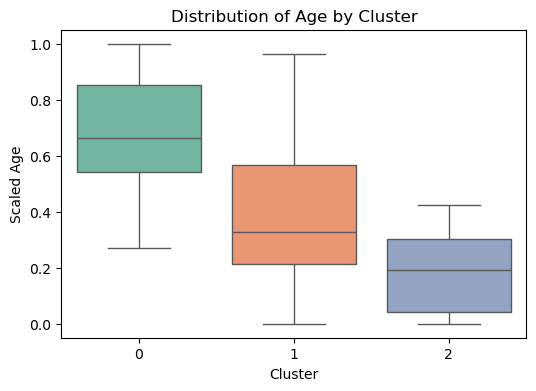

C:\Users\Angeline O.L\AppData\Local\Temp\ipykernel_11260\2941336628.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=clusters, y=df_minmax_scaled[f], palette='Set2')


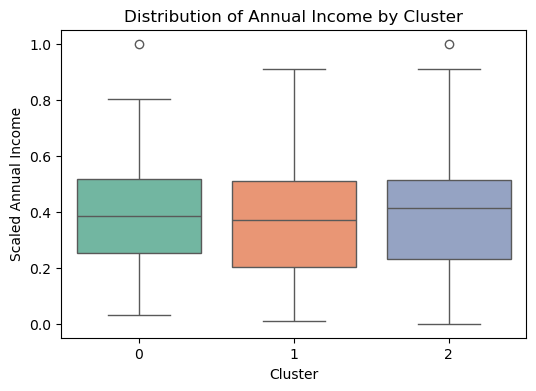

C:\Users\Angeline O.L\AppData\Local\Temp\ipykernel_11260\2941336628.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=clusters, y=df_minmax_scaled[f], palette='Set2')


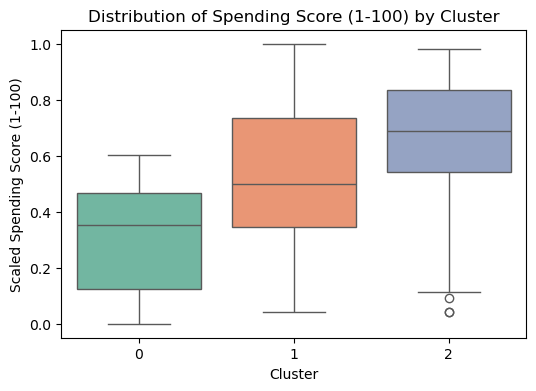

In [64]:
features = ['Age', 'Annual Income', 'Spending Score (1-100)']
for f in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=clusters, y=df_minmax_scaled[f], palette='Set2')
    plt.title(f'Distribution of {f} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Scaled {f}')
    plt.show()

The boxplot helps identify the characteristics of each cluster. For example, one cluster may consist of younger customers with high spending scores, while another cluster is dominated by older customers with lower spending levels. This visualization provides valuable insights for developing distinct marketing strategies tailored to each customer segment.

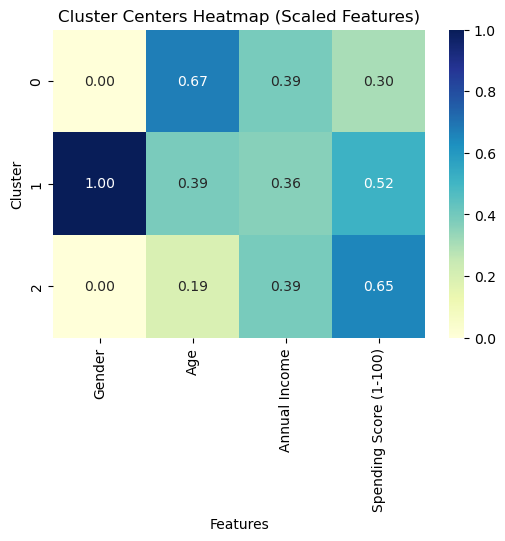

In [67]:
# Create DataFrame for cluster centers
centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_minmax_scaled.columns)

plt.figure(figsize=(6,4))
sns.heatmap(centers, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Cluster Centers Heatmap (Scaled Features)")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()

The heatmap displays the average scaled values of each feature for every cluster, helping to visualize how customer groups differ in terms of age, income, and spending score. For instance, one cluster might represent younger, high-spending individuals, while another shows older, low-spending customers, allowing marketers to design targeted offers for each group.

In [72]:
# Group the data by cluster and calculate summary statistics for each cluster
cluster_summary = df.groupby(clusters).agg({
    'Age': ['mean', 'min', 'max'],
    'Annual Income': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max']
})

# Rename the axis for clarity
cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

# Display the result
cluster_summary

Age         Annual Income           \
                     mean min max          mean min  max   
KMeans_cluster                                             
0               52.738095  32  70     62.214286  19  137   
1               38.098214  18  68     59.250000  16  126   
2               28.000000  18  40     62.239130  15  137   

               Spending Score (1-100)          
                                 mean min max  
KMeans_cluster                                 
0                           30.642857   1  60  
1                           51.526786   5  99  
2                           64.826087   5  97

## **Managerial Implications Based on the Three Clusters**

### **Cluster 0 — Young / Mid-Income Female Consumers**

**Profile:**

* Average age around 27–31 years.
* Mostly **female** with **mid-level income (~$60K)**.
* Spending score relatively **high** — enjoy shopping and lifestyle experiences.
* Likely young professionals or students in early career stage.

**Implications:**

* Focus on **affordable lifestyle products** or beauty/fashion segments.
* Use **Instagram, TikTok**, and influencer marketing for engagement.
* Offer **discounts, bundles, or flash sales** to increase frequency of purchase.
* Build brand attachment through **personalized recommendations** and visual appeal.

**Cluster 1 — Mature / High-Income Male Professionals**

**Profile:**

* Age between 35–45 years old.
* Mostly **male**, with **high annual income (~$150K)**.
* Spending score moderate — practical and quality-driven consumers.
* Prefer efficiency and trusted brands over novelty.

**Implications:**

* Target with **premium and professional products** (electronics, vehicles, or investment-related).
* Use **LinkedIn, email marketing, and professional networks**.
* Emphasize **quality, reliability, and exclusivity** in campaigns.
* Encourage brand loyalty with **premium memberships or concierge services**.

### **Cluster 2 — Older / Moderate-Income Mixed Segment**

**Profile:**

* Average age 40–45 years old.
* Balanced mix of **male and female** customers.
* **Moderate income (~$70K)** and **lower spending score** — more careful spenders.
* Likely family-oriented with steady but limited disposable income.

**Implications:**

* Offer **value-for-money packages** or family bundles.
* Use **Facebook and email campaigns** highlighting trust and practicality.
* Focus messaging on **durability, safety, and long-term savings**.
* Introduce **installment or loyalty rewards** to encourage repeat purchases.